In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#given data:

X= 15
h = 0.5
sigma_t = 1
sigma_a = 0

Q = 0
J_0 = 1
J_X = 0.0




In [10]:
#gaussian elimination 
def GE(A,S):
    As = np.diag(A)
    J= len(As)
    Bs = -1* np.diag(A,1)
    
    Ds = np.zeros(J)
    Ds[0] = As[0]
    T= np.zeros(J)
    T[0] = S[0]

    for i in range(1,J):
        Ds[i] = As[i] - Bs[i-1]**2/Ds[i-1]
        T[i] = S[i] + Bs[i-1] * T[i-1] / Ds[i-1]

    flux_GE =  np.zeros(J)
    flux_GE[J-1] = T[J-1] / Ds[J-1]

    for i in range(J-1):
        flux_GE[J-i-2] = (T[J-i-2] + Bs[J-i-2] * flux_GE[J-i-1]) / Ds[J-i-2] 
    return flux_GE

In [11]:
#Gauss-Siedel iteration method
def GS(A,S):
    As = np.diag(A)
    J= len(As)
    Bs = -1* np.diag(A,1)

    Flux_new = np.ones(J)
    Flux_old = np.zeros(J)
    temp= max(abs(Flux_new-Flux_old))

    while(temp > 10**-5):
    
        for i in range(J):
            if(i==0):
                Flux_new[i] = S[i]/As[i] + Bs[i] / As[i] * (Flux_old[i+1])
            if(i==J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1] / As[i] * (Flux_new[i-1])
            if(i!=0 and i!= J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1]/As[i] * (Flux_new[i-1]) + Bs[i]/As[i] * (Flux_old[i+1])
        
    
        err = Flux_new-Flux_old
    
        temp= max(abs(err))
    
        Flux_old = Flux_new.copy()

    Flux_GS = Flux_new.copy()
    return Flux_GS

In [12]:
#Jacobi iteration method
def Jac(A,S):
    As = np.diag(A)
    J= len(As)
    Bs = -1* np.diag(A,1)

    Flux_new = np.ones(J)
    Flux_old = np.zeros(J)
    temp= max(abs(Flux_new-Flux_old))

    while(temp > 10**-5):
    
        for i in range(J):
            if(i==0):
                Flux_new[i] = S[i]/As[i] + Bs[i] / As[i] * (Flux_old[i+1])
            if(i==J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1] / As[i] * (Flux_old[i-1])
            if(i!=0 and i!= J-1):
                Flux_new[i] = S[i]/As[i] + Bs[i-1]/As[i] * (Flux_old[i-1]) + Bs[i]/As[i] * (Flux_old[i+1])
        
    
        err = Flux_new-Flux_old
    
        temp= max(abs(err))
    
        Flux_old = Flux_new.copy()
    Flux_Jac = Flux_new.copy()

    return Flux_Jac

C:\Users\mdfah\AppData\Local\Temp\ipykernel_19268\855718226.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T[0] = S[0]
C:\Users\mdfah\AppData\Local\Temp\ipykernel_19268\855718226.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  T[i] = S[i] + Bs[i-1] * T[i-1] / Ds[i-1]
C:\Users\mdfah\AppData\Local\Temp\ipykernel_19268\625047359.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Flux_new[i] = S[i]/As[i] + Bs[i] / As[i] * (Flux_old[i+1])
C:\Users\mdfah\App

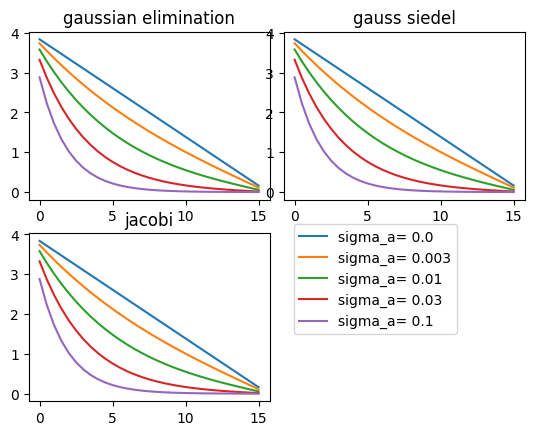

In [15]:
x = np.transpose(np.arange(0, 15+h, h))
k =0
result_GE= np.empty((len(x), 5))
result_GS= np.empty((len(x), 5))
result_Jac= np.empty((len(x), 5))

plot1 = plt.subplot2grid((2, 6), (0, 0), colspan=3, rowspan= 1) 
plot2 = plt.subplot2grid((2, 6), (0, 3), colspan=3, rowspan= 1) 
plot3 = plt.subplot2grid((2, 6), (1, 0), colspan=3, rowspan= 1) 




#cell edged:
for sigma_a in [0.0, 0.003, 0.01, 0.03, 0.1]:
    sigma_tr = sigma_t - sigma_a
    D = 1/(3*sigma_tr)
    arr_dim = len(x)
    A = np.zeros((arr_dim,arr_dim))
    S = np.zeros((arr_dim,1))

    for i in range(arr_dim):
        if(i==0):
            A[i,i] = D/h + 1/2 + 1/2 * sigma_a*h
            A[i,i+1] = -D/h
            S[i,0] = Q*h/2  + 2*J_0

        if (i!=0 and i != arr_dim-1):
            A[i,i] = (2*D/h+sigma_a*h)
            A[i,i+1] = -D/h
            A[i,i-1] = -D/h
            S[i,0] = Q*h

        if(i== arr_dim-1):
            A[i,i] = D/h + 1/2 * sigma_a*h+1/2
            A[i,i-1] = -D/h
            S[i,0] = 1/2*Q*h + 2*J_X
    
    result_GE[:,k] = GE(A,S)
    plot1.plot(x, result_GE[:,k], label='sigma_a= '+str(sigma_a) )
    plot1.set_title('gaussian elimination')

    result_GS[:,k] = GS(A,S)
    plot2.plot(x, result_GS[:,k], label='sigma_a= '+str(sigma_a))
    plot2.set_title('gauss siedel')
    
    result_Jac[:,k] = Jac(A,S)
    plot3.plot(x, result_Jac[:,k], label='sigma_a= '+str(sigma_a) )
    plot3.set_title('jacobi')
    k = k+1
plt.legend(loc=(1.1,.4))

plt.show()


In [14]:
'sigma_a= '+str(sigma_a)

'sigma_a= 0.1'